<a href="https://colab.research.google.com/github/noah40povis/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
from scipy import stats
import pandas as pd 
import numpy as np
import plotly as px 
from scipy.stats import chisquare

#28

In [99]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

data = pd.read_csv('/content/house-votes-84.data', names=column_headers)
data = data.replace({'y':1 , 'n':0 , '?': np.NaN})
data = data.dropna()
data.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [100]:
dem = data[data['party']=='democrat']
dem = dem.sample(20)
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
175,democrat,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
333,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
193,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
147,democrat,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [101]:
rep = data[data['party']=='republican']
rep = rep.sample(20)
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
83,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
346,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
340,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
420,republican,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
176,republican,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [102]:
dem['physician-fee-freeze'].mean()

0.0

In [103]:
rep['physician-fee-freeze'].mean()

0.95

***Confidence interval formula***


In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr= s / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2.0, n-1)
  margin_of_error = t * stderr
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, upper_bound, x_bar) 

In [105]:
confidence_interval(dem['physician-fee-freeze'])

(0.0, 0.0, 0.0)

In [106]:
#checking the confidence interval for dem votes
lower_bound, upper_bound_dem, dem_x_bar = confidence_interval(dem['physician-fee-freeze'])

print('lower:', lower_bound)
print('upper:', upper_bound_dem)
print('mean:', dem_x_bar)


lower: 0.0
upper: 0.0
mean: 0.0


In [107]:
#checking the confidence interval for republican votes 
lower_bound, upper_bound_rep, rep_x_bar = confidence_interval(rep['physician-fee-freeze'])

print('lower:', lower_bound)
print('upper:', upper_bound_rep)
print('mean:', rep_x_bar)

lower: 0.8453487972795868
upper: 1.0546512027204131
mean: 0.95


In [108]:
#creating a variable that holds the moe for each party so I can apply it to 
moe_dem = upper_bound_dem - dem_x_bar
moe_rep = upper_bound_rep - rep_x_bar
print(moe_dem)
print(moe_rep)

0.0
0.10465120272041317


***Creating Graph***


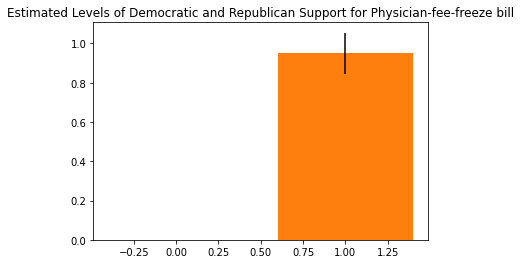

In [109]:
import matplotlib.pyplot as plt

plt.bar(0, height=dem_x_bar, yerr=moe_dem)
plt.bar(1, height=rep_x_bar, yerr= moe_rep)
plt.title("Estimated Levels of Democratic and Republican Support for Physician-fee-freeze bill")
plt.show()


<ErrorbarContainer object of 3 artists>
<ErrorbarContainer object of 3 artists>


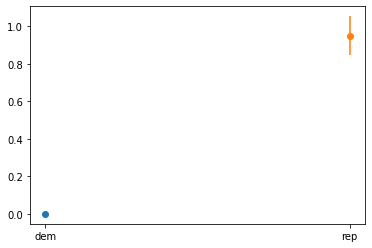

In [110]:
print(plt.errorbar(["dem"], dem_x_bar, yerr=moe_dem, fmt='o'))
print(plt.errorbar(["rep"], rep_x_bar, yerr=moe_rep, fmt='o'))


**explaination**

Looking at the bar chart for both the democrats and republicans the first thing to point out is that the republicans had a higher mean of voting yes on the Physician-fee-freeze bill compared to the Democrats. This could signify that Republicans feel stronger about the passing of the bill than the Democrats. In addition, the error-bar for the republican party is relatively small indicating virtually no variance in values and that the mean given is very reliable. 

Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

**Part 4**

In [0]:
car_column_header = ["Cost", "MaintanceCost", "Doors", "Person", "Lug_boot_size", "Safety", "Acceptability"]
# old csv 
df2 = pd.read_csv('/content/car.data' , names=car_column_header)

In [112]:
df2.head()

,Cost,MaintanceCost,Doors,Person,Lug_boot_size,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [113]:
# making sure its categorical
df2['Lug_boot_size'].value_counts()

small    576
big      576
med      576
Name: Lug_boot_size, dtype: int64

In [114]:
# scanning for any null values we would need to eliminate 

df2['Lug_boot_size'].isnull().sum()

0

In [115]:
# making sure its categorical

df2['Safety'].value_counts()

low     576
high    576
med     576
Name: Safety, dtype: int64

In [116]:
# scanning for any null values we would need to eliminate 

df2['Safety'].isnull().sum()

0

In [139]:
# crosstab 
observed = pd.crosstab(df2['Lug_boot_size'], df2['Safety'], margins=True)

observed

Safety,high,low,med,All
Lug_boot_size,,,,
big,192,192,192,576
med,192,192,192,576
small,192,192,192,576
All,576,576,576,1728


In [140]:
# grab the row sums from the crosstab

row_sums = observed.iloc[0:4,3:].values 
row_sums = row_sums.T[0]

row_sums

array([ 576,  576,  576, 1728])

In [141]:
# grab the column sums from the crosstab 
col_sums = observed.iloc[3:, :4].values
col_sums = col_sums[0]
col_sums

array([ 576,  576,  576, 1728])

In [120]:

total_total = df2.shape[0]

total_total

1728

In [121]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(4, 4)
[[ 192.  192.  192.  576.]
 [ 192.  192.  192.  576.]
 [ 192.  192.  192.  576.]
 [ 576.  576.  576. 1728.]]


In [122]:
chi2 = ((observed-expected)**2 / expected).sum().sum()
chi2

0.0

dof = (4-1)(4-1) = 9

```
# This is formatted as code
```



In [123]:
#single line using scipy 
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)


 chi2 statistic 0.0

 p-value 1.0

 degrees of freedom 9

 expected frequencies table: 
 [[ 192.  192.  192.  576.]
 [ 192.  192.  192.  576.]
 [ 192.  192.  192.  576.]
 [ 576.  576.  576. 1728.]]


Given a p-value of 1 I fail to reject the null hypothesis that these two outcomes are dependent of eachother. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
column_names = ['Clump Thickness' , 'Uniformity of Cell Size ', 'Uniformity of Cell Shape', 'Marginal Adhesion ', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']           


df3 = pd.read_csv('/content/breast-cancer-wisconsin.data', names= column_names)

In [129]:
df3.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [149]:
observed = pd.crosstab(df3['Clump Thickness'], df3['Uniformity of Cell Shape'], margins=True)

observed
observed.shape

(11, 11)

In [145]:
row_sums = observed.iloc[0:11,10:].values 
row_sums = row_sums.T[0]

row_sums

array([145,  50, 108,  80, 130,  34,  23,  46,  14,  69, 699])

In [146]:
col_sums = observed.iloc[10:, 0:11].values
col_sums = col_sums[0]
col_sums

array([353,  59,  56,  44,  34,  30,  30,  28,   7,  58, 699])

In [147]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(11, 11)
[[2.96209491e+01 4.95081019e+00 4.69907407e+00 3.69212963e+00
  2.85300926e+00 2.51736111e+00 2.51736111e+00 2.34953704e+00
  5.87384259e-01 4.86689815e+00 5.86545139e+01]
 [1.02141204e+01 1.70717593e+00 1.62037037e+00 1.27314815e+00
  9.83796296e-01 8.68055556e-01 8.68055556e-01 8.10185185e-01
  2.02546296e-01 1.67824074e+00 2.02256944e+01]
 [2.20625000e+01 3.68750000e+00 3.50000000e+00 2.75000000e+00
  2.12500000e+00 1.87500000e+00 1.87500000e+00 1.75000000e+00
  4.37500000e-01 3.62500000e+00 4.36875000e+01]
 [1.63425926e+01 2.73148148e+00 2.59259259e+00 2.03703704e+00
  1.57407407e+00 1.38888889e+00 1.38888889e+00 1.29629630e+00
  3.24074074e-01 2.68518519e+00 3.23611111e+01]
 [2.65567130e+01 4.43865741e+00 4.21296296e+00 3.31018519e+00
  2.55787037e+00 2.25694444e+00 2.25694444e+00 2.10648148e+00
  5.26620370e-01 4.36342593e+00 5.25868056e+01]
 [6.94560185e+00 1.16087963e+00 1.10185185e+00 8.65740741e-01
  6.68981481e-01 5.90277778e-01 5.90277778e-01 5.50925926e-01
  1.377

In [148]:
chi2 = ((observed-expected)**2 / expected).sum().sum()
chi2

3599.845214979792

In [0]:
#dof = (11-1)(11-1) = 100 

In [0]:
# I got a p-value of 0 when putting it into the online calculator 

In [150]:


chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)


 chi2 statistic 464.71541827018234

 p-value 2.2292325856001166e-48

 degrees of freedom 100

 expected frequencies table: 
 [[7.32260372e+01 1.22389127e+01 1.16165951e+01 9.12732475e+00
  7.05293276e+00 6.22317597e+00 6.22317597e+00 5.80829757e+00
  1.45207439e+00 1.20314735e+01 1.45000000e+02]
 [2.52503577e+01 4.22031474e+00 4.00572246e+00 3.14735336e+00
  2.43204578e+00 2.14592275e+00 2.14592275e+00 2.00286123e+00
  5.00715308e-01 4.14878398e+00 5.00000000e+01]
 [5.45407725e+01 9.11587983e+00 8.65236052e+00 6.79828326e+00
  5.25321888e+00 4.63519313e+00 4.63519313e+00 4.32618026e+00
  1.08154506e+00 8.96137339e+00 1.08000000e+02]
 [4.04005722e+01 6.75250358e+00 6.40915594e+00 5.03576538e+00
  3.89127325e+00 3.43347639e+00 3.43347639e+00 3.20457797e+00
  8.01144492e-01 6.63805436e+00 8.00000000e+01]
 [6.56509299e+01 1.09728183e+01 1.04148784e+01 8.18311874e+00
  6.32331903e+00 5.57939914e+00 5.57939914e+00 5.20743920e+00
  1.30185980e+00 1.07868383e+01 1.30000000e+02]
 [1.71702432e+0

My results from using the one line scipy vs doing it by hand through numpy differ. I know my error lies with the rows and cols totals I inputted. I am having an issue with the 'iloc' function. 

After finding a p-value of 2.22 I fail to reject the null hypothesis of these two outcomes being dependent of eachother 

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)